# What is clustering

#### Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

# How clustering helps in performing EDA

#### It gives better understanding of data or Image  by grouping the values
#### Since,  It finds the similiar groups it could be easy to fill the Null Values.
#### Clustering is also used in outlier detection .
#### Finding similiar patterns helps in concentrating that particular group/Cluster and do analysis accordingly.

# What is the difference between K Means & Agglomerative Clustering. Explain it using some data in Jupyter Notebook through Coding

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [13]:
#Lets take an example Mall_customers
mall=pd.read_csv('Mall_Customers.csv')

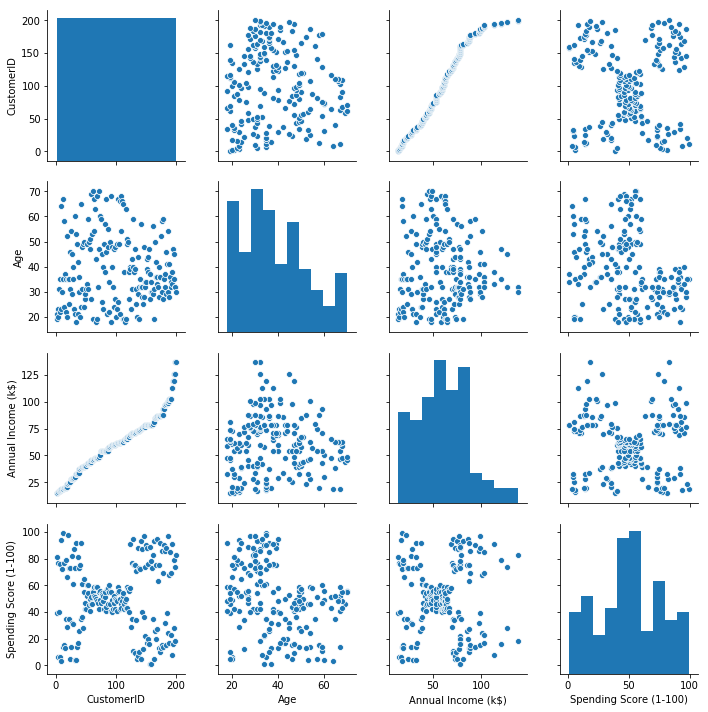

In [5]:
sns.pairplot(mall)

In [6]:
x=mall.iloc[:,[3,4]]
y=mall.iloc[:,[2,3,4]]

## Applying KMeans Clustering

In [7]:
ks=range(1,15)
wcss=[]
for k in ks:
    #Define the model
    model=KMeans(n_clusters=k)
    #Fit the model
    model.fit(x)#Fitting the model only to 3rd and 4th columns
    wcss.append(model.inertia_)

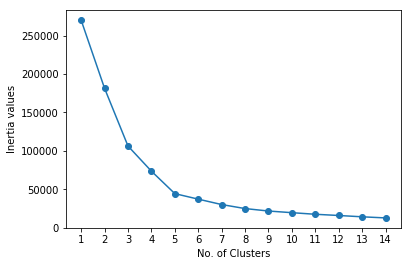

In [8]:
#Plot the results to find the elbow
plt.plot(ks,wcss,"-o")
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [9]:
#Now fittinf the model taking the no. of clusters as 5
model=KMeans(n_clusters=5,random_state=42)
model.fit(x)
labels=model.predict(x)


In [10]:
centroids=model.cluster_centers_

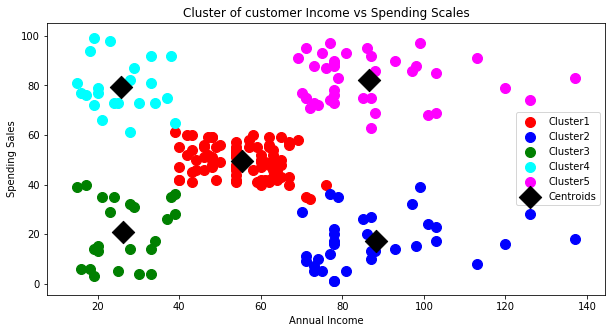

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(x[labels==0].iloc[:,0],x[labels==0].iloc[:,1],s=100,c='red',label='Cluster1')
plt.scatter(x[labels==1].iloc[:,0],x[labels==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[labels==2].iloc[:,0],x[labels==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(x[labels==3].iloc[:,0],x[labels==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[labels==4].iloc[:,0],x[labels==4].iloc[:,1],s=100,c='magenta',label='Cluster5')
plt.scatter(centroids[:,0],centroids[:,1],s=250,c='black',marker='D',label='Centroids')
plt.title('Cluster of customer Income vs Spending Scales')
plt.xlabel('Annual Income')
plt.ylabel('Spending Sales')
plt.legend()
plt.show()

## Apllying Aggloremative Clustering

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [16]:
sch.linkage(x,method='ward')# Ward minimizes the wcss

array([[ 65.        ,  68.        ,   0.        ,   2.        ],
       [ 48.        ,  49.        ,   0.        ,   2.        ],
       [156.        , 158.        ,   0.        ,   2.        ],
       [129.        , 131.        ,   0.        ,   2.        ],
       [ 21.        ,  23.        ,   1.        ,   2.        ],
       [ 51.        ,  53.        ,   1.        ,   2.        ],
       [ 60.        ,  61.        ,   1.        ,   2.        ],
       [ 67.        ,  69.        ,   1.        ,   2.        ],
       [ 64.        ,  66.        ,   1.        ,   2.        ],
       [ 79.        ,  82.        ,   1.        ,   2.        ],
       [ 74.        ,  85.        ,   1.        ,   2.        ],
       [ 78.        ,  80.        ,   1.        ,   2.        ],
       [ 75.        ,  81.        ,   1.        ,   2.        ],
       [ 92.        ,  97.        ,   1.        ,   2.        ],
       [101.        , 109.        ,   1.        ,   2.        ],
       [107.        , 113

Text(0, 0.5, 'Distance Measure')

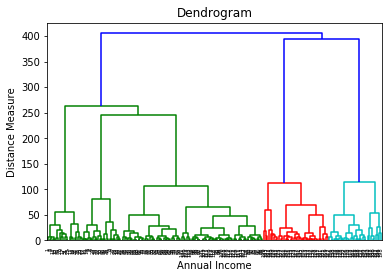

In [17]:
# Here we check the dendrogram and define our K-value
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Annual Income')
plt.ylabel('Distance Measure')

In [19]:
model_h=AgglomerativeClustering(n_clusters=5,linkage='ward')

In [20]:
labels_h=model_h.fit_predict(x)

# Plotting the difference between Aggloremative and Kmeans Clustering

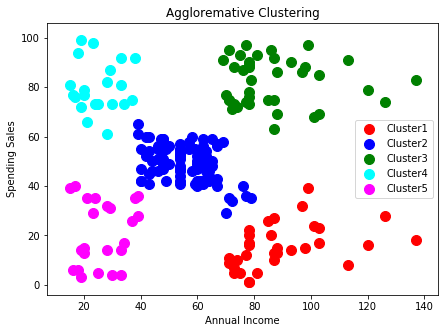

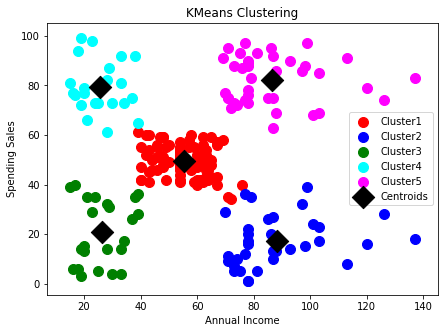

In [22]:
plt.figure(figsize=(7,5))
plt.scatter(x[labels_h==0].iloc[:,0],x[labels_h==0].iloc[:,1],s=100,c='red',label='Cluster1')
plt.scatter(x[labels_h==1].iloc[:,0],x[labels_h==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[labels_h==2].iloc[:,0],x[labels_h==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(x[labels_h==3].iloc[:,0],x[labels_h==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[labels_h==4].iloc[:,0],x[labels_h==4].iloc[:,1],s=100,c='magenta',label='Cluster5')
plt.title('Cluster of customer Income vs Spending Scales')
plt.xlabel('Annual Income')
plt.ylabel('Spending Sales')
plt.title('Aggloremative Clustering')
plt.legend()
plt.show()
#KMeans Clustering
plt.figure(figsize=(7,5))
plt.scatter(x[labels==0].iloc[:,0],x[labels==0].iloc[:,1],s=100,c='red',label='Cluster1')
plt.scatter(x[labels==1].iloc[:,0],x[labels==1].iloc[:,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[labels==2].iloc[:,0],x[labels==2].iloc[:,1],s=100,c='green',label='Cluster3')
plt.scatter(x[labels==3].iloc[:,0],x[labels==3].iloc[:,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[labels==4].iloc[:,0],x[labels==4].iloc[:,1],s=100,c='magenta',label='Cluster5')
plt.scatter(centroids[:,0],centroids[:,1],s=250,c='black',marker='D',label='Centroids')
plt.title('Cluster of customer Income vs Spending Scales')
plt.xlabel('Annual Income')
plt.ylabel('Spending Sales')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

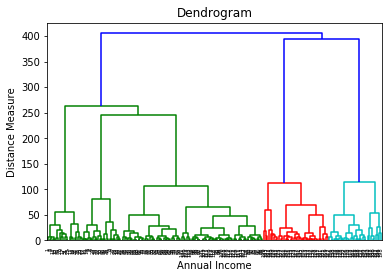

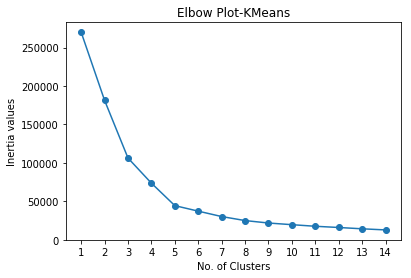

In [25]:
# Aggloremative-Dendrogram
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Annual Income')
plt.ylabel('Distance Measure')
plt.show()

#Kmeans Elbow Plot
plt.title('Elbow Plot-KMeans')
plt.plot(ks,wcss,"-o")
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [26]:
# Here are the various differences between them

### Hierarchical clustering can’t handle big data well but K Means clustering can. This is because the time complexity of K Means is linear.
### In K Means clustering, since we start with random choice of clusters, the results produced by running the algorithm multiple times might differ. While results are reproducible in Hierarchical clustering.
### K Means is found to work well when the shape of the clusters is hyper spherical (like circle in 2D, sphere in 3D).
### K Means clustering requires prior knowledge of K i.e. no. of clusters you want to divide your data into. But, you can stop at whatever number of clusters you find appropriate in hierarchical clustering by interpreting the dendrogram

# Explain the Difference between the Silhoutte Score and Linkage Method – “Single”

### "Silhoutte co-efficients" on Kmeans is used to find the optimal no. of clusters, where as,  "Linkage" is a method of Hierarchial clustering which is based on grouping clusters in bottom-up fashion (agglomerative clustering), at each step combining two clusters that contain the closest pair of elements not yet belonging to the same cluster as each other. 

### Silhoutte ranges from -1 to +1

### The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

### A drawback of ''Linkage'' method is that it tends to produce long thin clusters in which nearby elements of the same cluster have small distances, but elements at opposite ends of a cluster may be much farther from each other than two elements of other clusters. This may lead to difficulties in defining classes.

# Consider the University Dataset with the 777 Rows and 18 Columns. Here, you need to identify the optimum cluster size by using K Means.

In [33]:
import pandas as pd
import seaborn as sns

In [30]:
data=pd.read_csv('+College+Data.csv')

In [31]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [32]:
# Using KMeans to find optimal clusters

In [35]:
data.shape

(777, 19)

In [37]:
data=data.drop(columns='Unnamed: 0')

C:\Users\sebas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


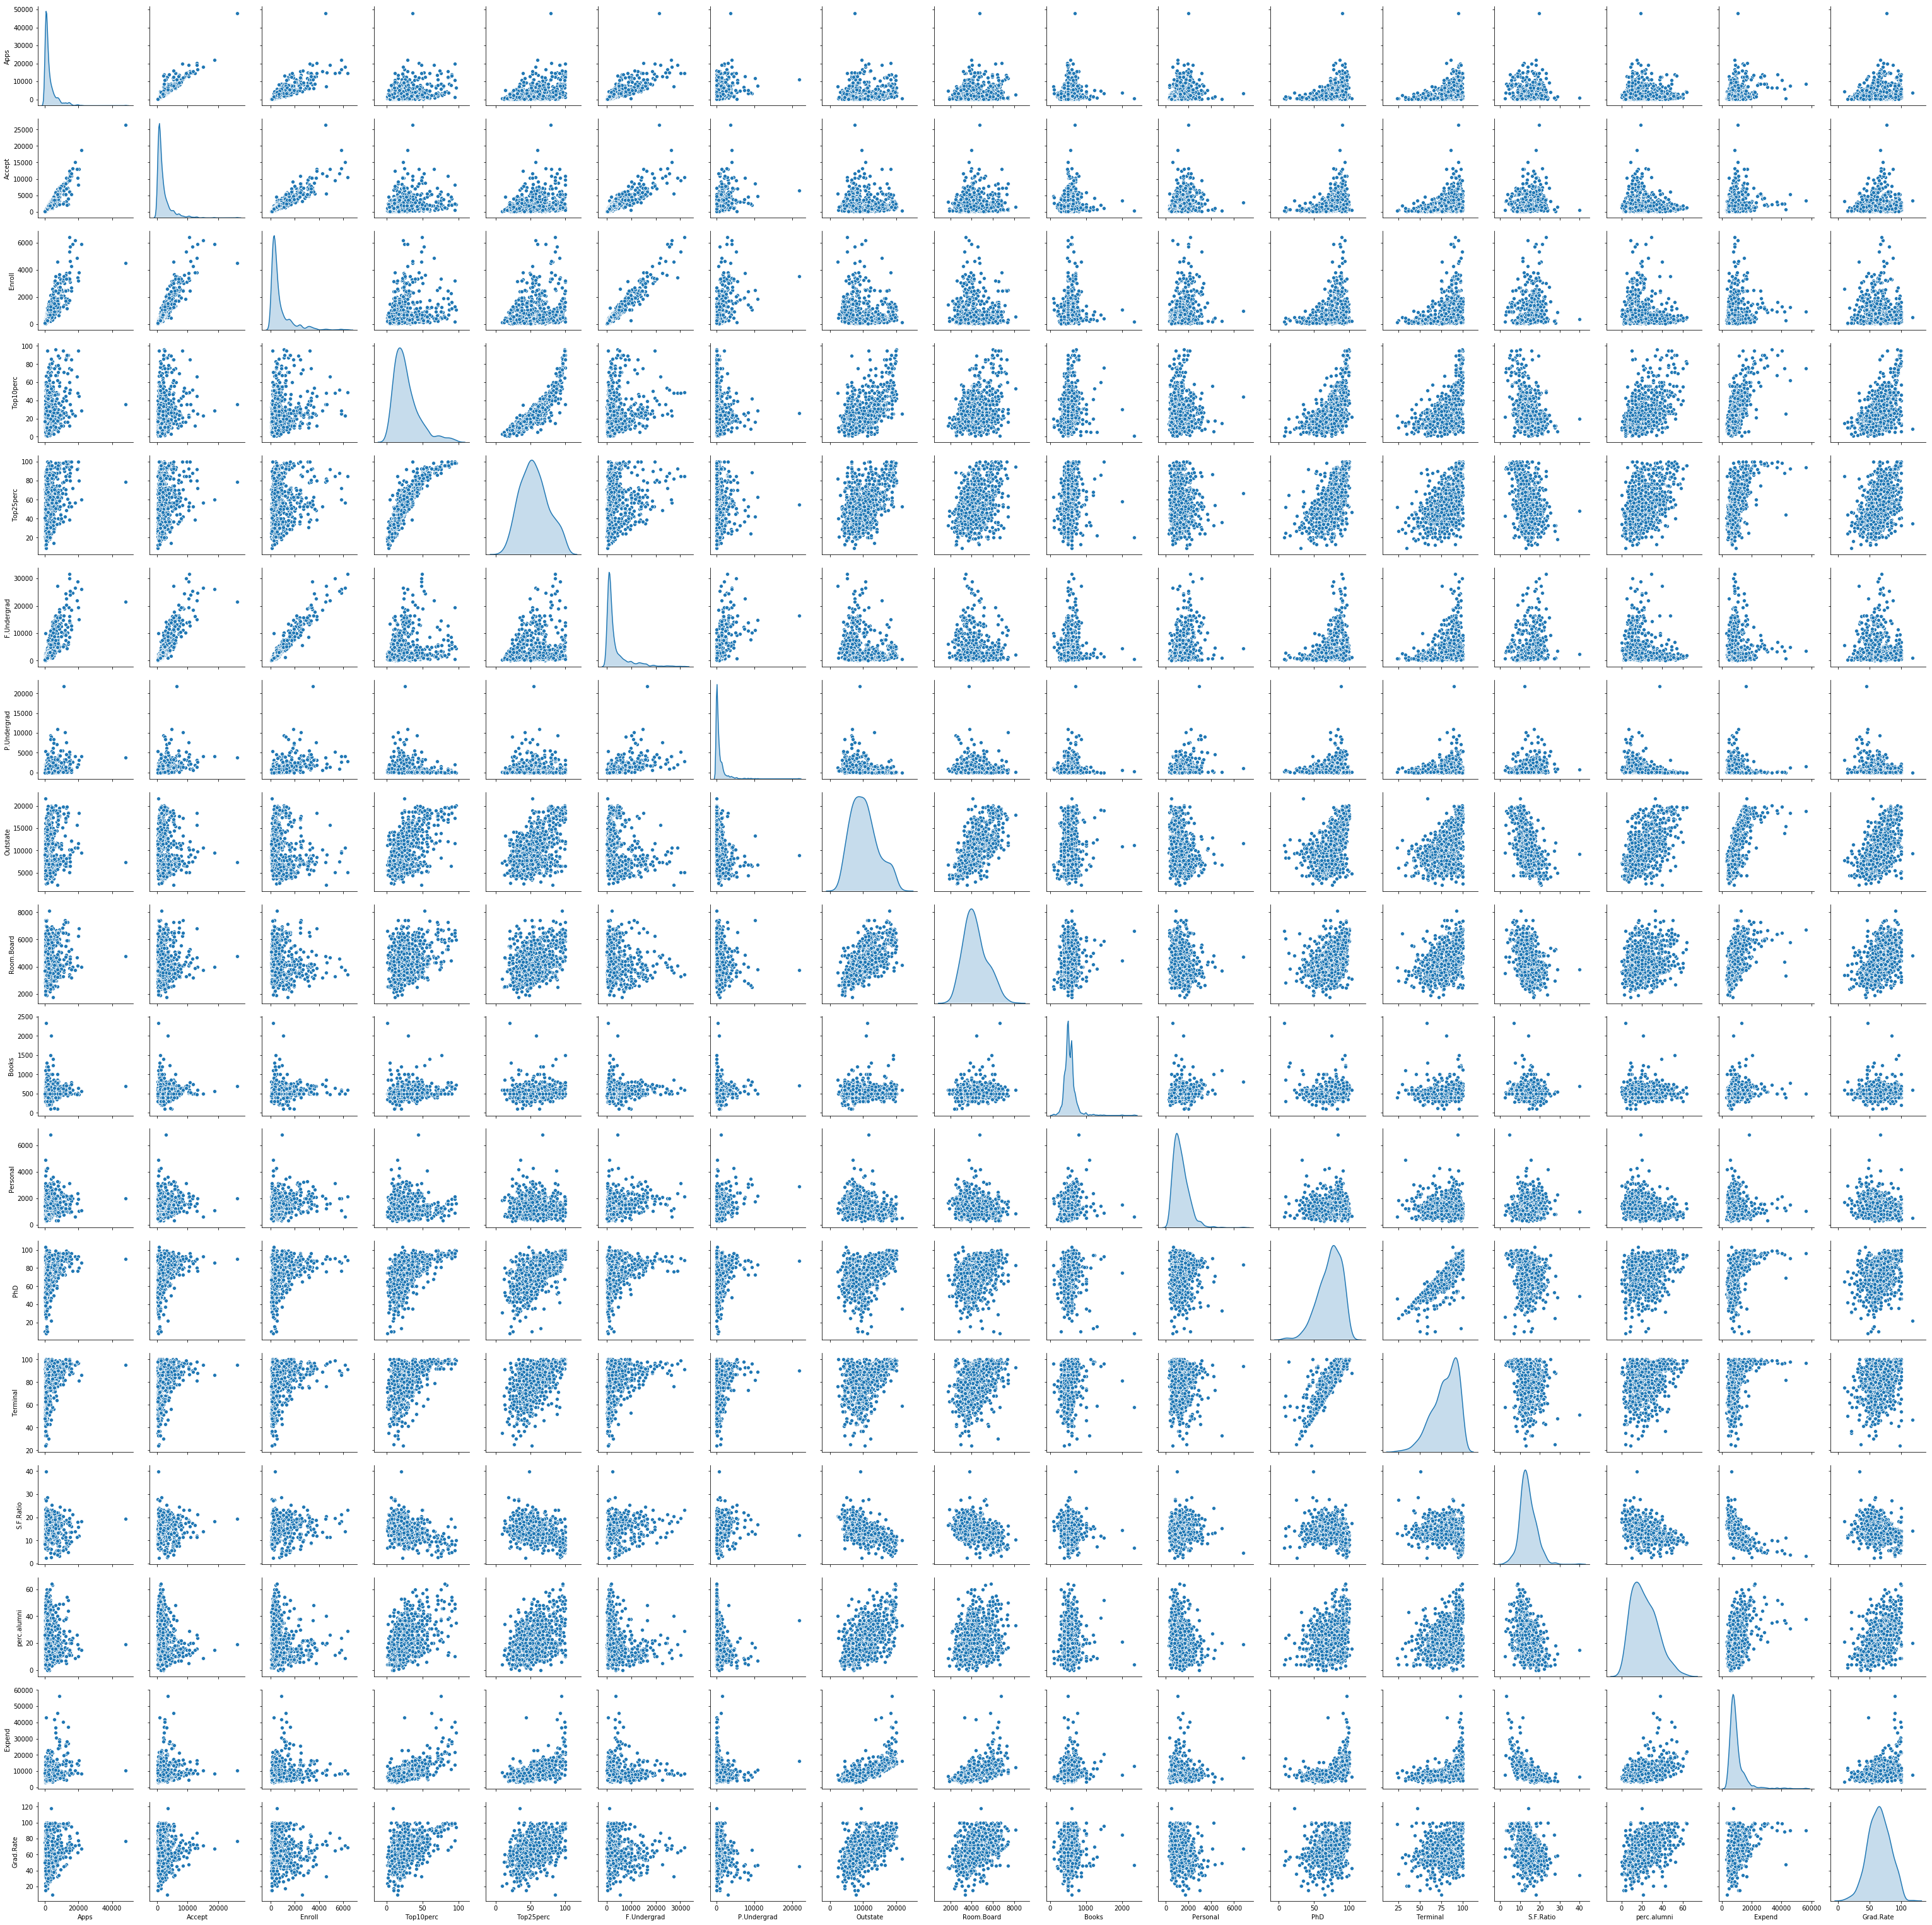

In [34]:
sns.pairplot(data=data,diag_kind='kde')

In [38]:
data.shape

(777, 18)

In [42]:
data=pd.get_dummies(data)

In [46]:
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private_No,Private_Yes
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0,1
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0,1
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0,1
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0,1
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0,1


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
Private_No     777 non-null uint8
Private_Yes    777 non-null uint8
dtypes: float64(1), int64(16), uint8(2)
memory usage: 104.8 KB


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
std=StandardScaler()
std.fit(data)
data_std=std.transform(data)

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sebas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
ks=range(1,15)
wcss=[]
for k in ks:
    #Define the model
    model=KMeans(n_clusters=k)
    #Fit the model
    model.fit(data)#Fitting the model only to 3rd and 4th columns
    wcss.append(model.inertia_)

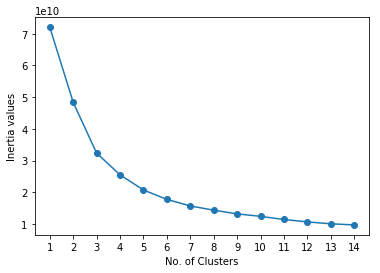

In [50]:
#Plot the results to find the elbow
plt.plot(ks,wcss,"-o")
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

# We could say that the optimum no.of cluster size would be '4'

# Consider the Titanic Train Set. Generate Clustering Model on the Training Dataset and find the following

In [72]:
data=pd.read_csv('Titanictrain.csv')

In [73]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
# Summary Statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
data.shape

(891, 12)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\sebas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sebas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\sebas\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


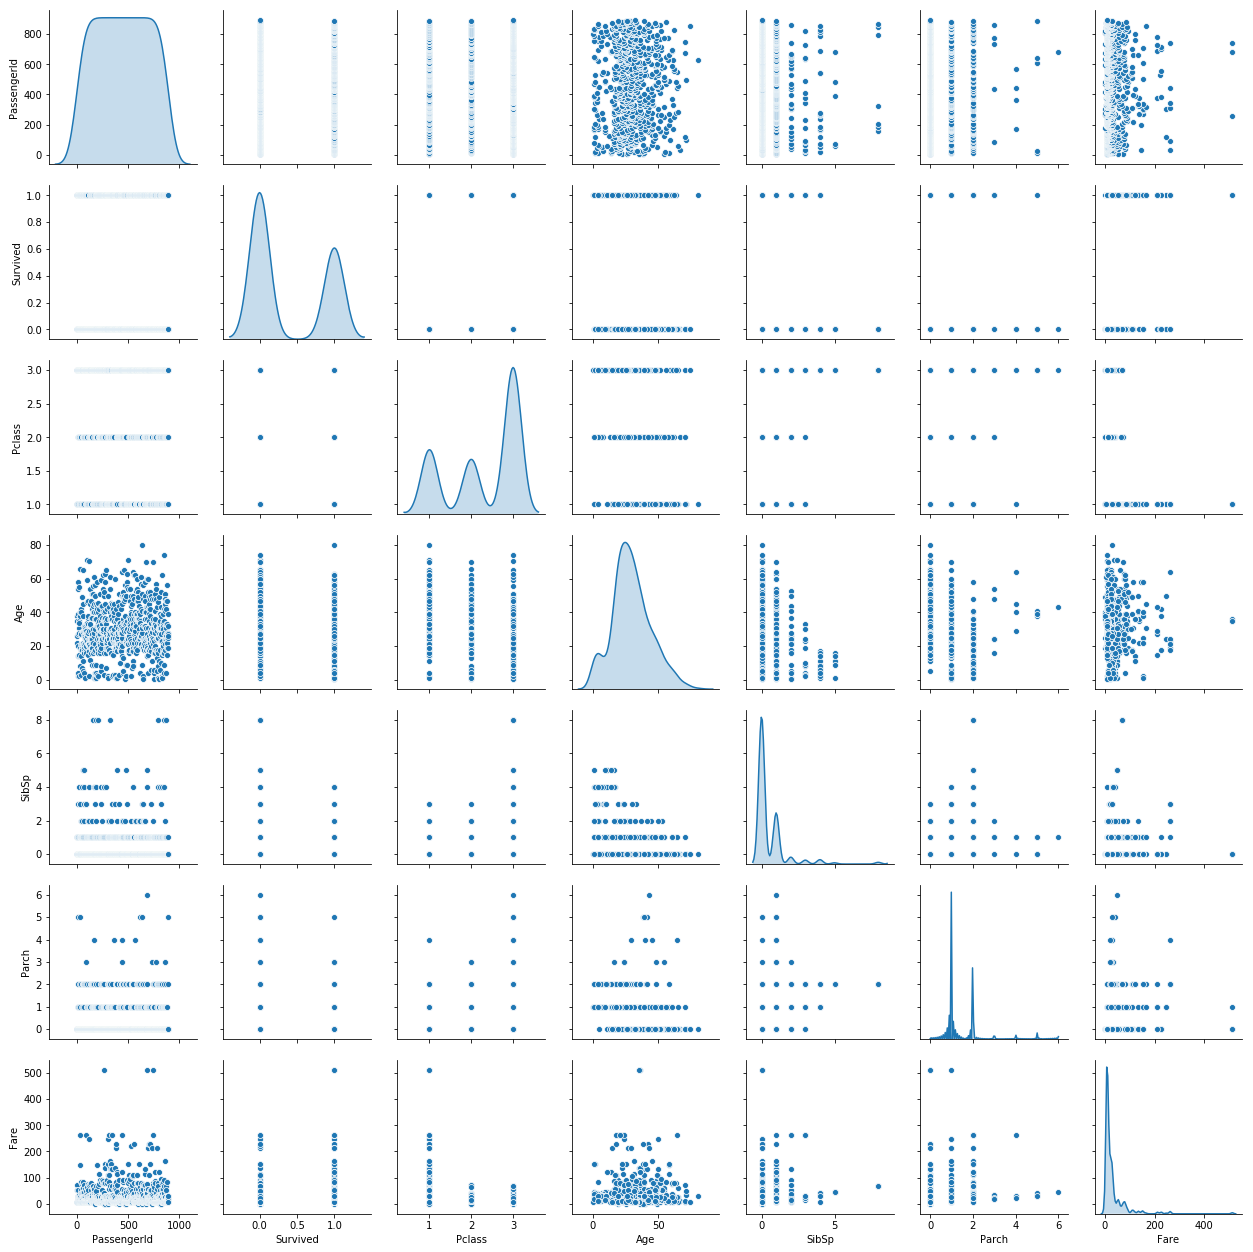

In [78]:
sns.pairplot(data,diag_kind='kde')

### Data Munging : Working with missing values

In [60]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [61]:
data[data.Age.isnull()].head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [104]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [105]:
data.Name.map(lambda x : GetTitle(x))

0          mr
1         mrs
2        miss
3         mrs
4          mr
5          mr
6          mr
7      master
8         mrs
9         mrs
10       miss
11       miss
12         mr
13         mr
14       miss
15        mrs
16     master
17         mr
18        mrs
19        mrs
20         mr
21         mr
22       miss
23         mr
24       miss
25        mrs
26         mr
27         mr
28       miss
29         mr
        ...  
861        mr
862       mrs
863      miss
864        mr
865       mrs
866      miss
867        mr
868        mr
869    master
870        mr
871       mrs
872        mr
873        mr
874       mrs
875      miss
876        mr
877        mr
878        mr
879       mrs
880       mrs
881        mr
882      miss
883        mr
884        mr
885       mrs
886       rev
887      miss
888      miss
889        mr
890        mr
Name: Name, Length: 891, dtype: object

In [106]:
data.Name.map(lambda x : GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer'], dtype=object)

In [107]:
# create Title feature
data['Title'] =  data.Name.map(lambda x : GetTitle(x))

In [108]:
title_age_median = data.groupby('Title').Age.transform('median')

In [109]:
# Replacing all null values in age based on their (Name)Title
data.Age.fillna(title_age_median , inplace=True)

In [110]:
# Check Null values 
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Fare_Bin       0
AgeState       0
FamilySize     0
Title          0
dtype: int64

# Out of 891 Records in my data I have 687 Null values in 'Cabin' so filling null values with mode is not a good practise so we 'DROP'

In [111]:
data=data.drop(columns='Cabin')

KeyError: "['Cabin'] not found in axis"

In [80]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [81]:
# Working with Outliers

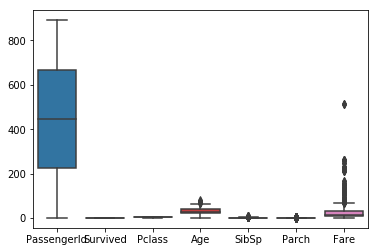

In [82]:
sns.boxplot(data=data)

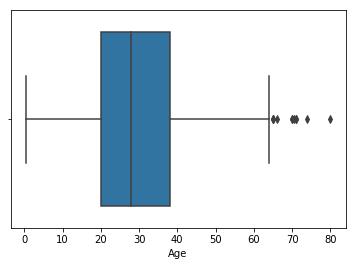

In [83]:
sns.boxplot(x='Age',data=data)

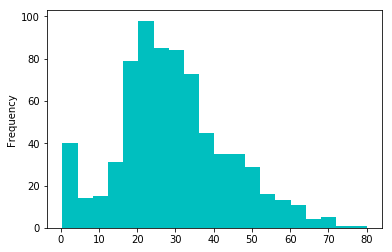

In [84]:
# use histogram to get understand the distribution
data.Age.plot(kind='hist', bins=20, color='c');

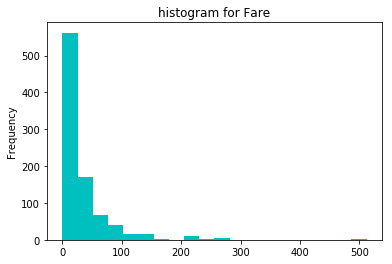

In [85]:
# histogram for fare
data.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

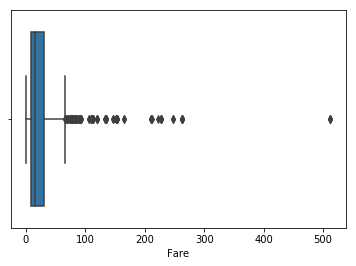

In [86]:
sns.boxplot(x='Fare',data=data)

In [87]:
# look into the outliers
data.loc[data.Fare == data.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [88]:
# Filling with Upper Whisker 
median = np.median(data.Fare)
upper_quartile = np.percentile(data.Fare, 75)
lower_quartile = np.percentile(data.Fare, 25)

iqr = upper_quartile - lower_quartile
upper_whisker = data.Fare[data.Fare<=upper_quartile+1.5*iqr].max()
lower_whisker = data.Fare[data.Fare>=lower_quartile-1.5*iqr].min()

In [89]:
data.loc[data.Fare>upper_whisker, 'Fare'] = upper_whisker

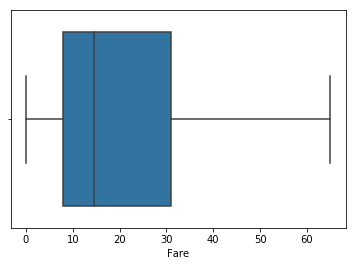

In [90]:
sns.boxplot(x='Fare',data=data)

In [91]:
# binning
pd.qcut(data.Fare, 4).head(20)

0     (-0.001, 7.91]
1       (31.0, 65.0]
2     (7.91, 14.454]
3       (31.0, 65.0]
4     (7.91, 14.454]
5     (7.91, 14.454]
6       (31.0, 65.0]
7     (14.454, 31.0]
8     (7.91, 14.454]
9     (14.454, 31.0]
10    (14.454, 31.0]
11    (14.454, 31.0]
12    (7.91, 14.454]
13      (31.0, 65.0]
14    (-0.001, 7.91]
15    (14.454, 31.0]
16    (14.454, 31.0]
17    (7.91, 14.454]
18    (14.454, 31.0]
19    (-0.001, 7.91]
Name: Fare, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 65.0]]

In [92]:
pd.qcut(data.Fare, 4, labels=['very_low','low','high','very_high']).head(20) # discretization

0      very_low
1     very_high
2           low
3     very_high
4           low
5           low
6     very_high
7          high
8           low
9          high
10         high
11         high
12          low
13    very_high
14     very_low
15         high
16         high
17          low
18         high
19     very_low
Name: Fare, dtype: category
Categories (4, object): [very_low < low < high < very_high]

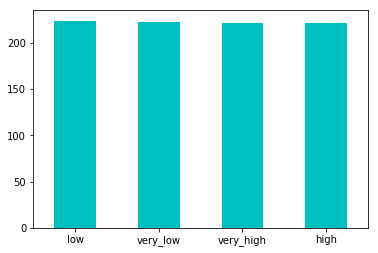

In [93]:
pd.qcut(data.Fare, 4, labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar', color='c', rot=0);

In [94]:
# creating fare bin feature to my data
data['Fare_Bin'] = pd.qcut(data.Fare, 4, labels=['very_low','low','high','very_high'])

# Feature Engineering

### Feature : Age State ( Adult or Child )

In [95]:
# AgeState based on Age
data['AgeState'] = np.where(data['Age'] >= 18, 'Adult','Child')

In [96]:
# AgeState Counts
data['AgeState'].value_counts()

Adult    601
Child    290
Name: AgeState, dtype: int64

In [97]:
# crosstab
pd.crosstab(data[data.Survived != -888].Survived, data[data.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,372,177
1,229,113


### Feature : FamilySize

In [98]:
# Family : Adding Parents with Siblings
data['FamilySize'] = data.Parch + data.SibSp + 1 # 1 for self

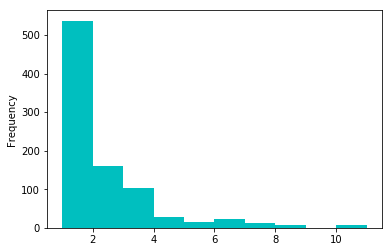

In [99]:
# explore the family feature
data['FamilySize'].plot(kind='hist', color='c');

In [100]:
# further explore this family with max family members
data.loc[data.FamilySize == data.FamilySize.max(),['Name','Survived','FamilySize','Ticket']]

,Name,Survived,FamilySize,Ticket
159,"Sage, Master. Thomas Henry",0,11,CA. 2343
180,"Sage, Miss. Constance Gladys",0,11,CA. 2343
201,"Sage, Mr. Frederick",0,11,CA. 2343
324,"Sage, Mr. George John Jr",0,11,CA. 2343
792,"Sage, Miss. Stella Anna",0,11,CA. 2343
846,"Sage, Mr. Douglas Bullen",0,11,CA. 2343
863,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343


In [101]:
pd.crosstab(data[data.Survived != -888].Survived, data[data.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature : IsMother

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_Bin,AgeState,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,S,very_low,Adult,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.000,C,very_high,Adult,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S,low,Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.100,S,very_high,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,S,low,Adult,1


In [112]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
data['IsMother'] = np.where(((data.Sex == 'female') & (data.Parch > 0) & (data.Age > 18) & (data.Title != 'Miss')), 1, 0)

In [113]:
# Crosstab with IsMother
pd.crosstab(data[data.Survived != -888].Survived, data[data.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,524,25
1,291,51


### Categorical Feature Encoding

In [114]:
# sex
data['IsMale'] = np.where(data.Sex == 'male', 1, 0)

In [115]:
# columns Deck, Pclass, Title, AgeState
df = pd.get_dummies(data,columns=['Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])

In [116]:
# drop columns
df.drop(['Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [117]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 36 columns):
Survived              891 non-null int64
PassengerId           891 non-null int64
Age                   891 non-null float64
Fare                  891 non-null float64
FamilySize            891 non-null int64
IsMother              891 non-null int32
IsMale                891 non-null int32
Pclass_1              891 non-null uint8
Pclass_2              891 non-null uint8
Pclass_3              891 non-null uint8
Title_capt            891 non-null uint8
Title_col             891 non-null uint8
Title_don             891 non-null uint8
Title_dr              891 non-null uint8
Title_jonkheer        891 non-null uint8
Title_lady            891 non-null uint8
Title_major           891 non-null uint8
Title_master          891 non-null uint8
Title_miss            891 non-null uint8
Title_mlle            891 non-null uint8
Title_mme             891 non-null uint8
Title_mr              891 non-

In [119]:
df.shape

(891, 36)

# Applying KMeans

In [120]:
std=StandardScaler()
std.fit(df)
df_std=std.transform(df)

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sebas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
ks=range(1,15)
wcss=[]
for k in ks:
    #Define the model
    model=KMeans(n_clusters=k)
    #Fit the model
    model.fit(df_std)#Fitting the model only to 3rd and 4th columns
    wcss.append(model.inertia_)

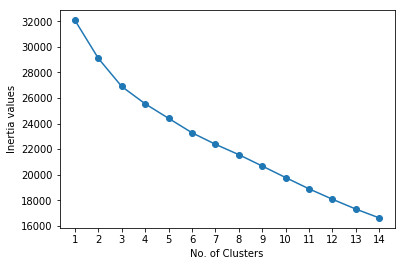

In [122]:
#Plot the results to find the elbow
plt.plot(ks,wcss,"-o")
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia values')
plt.xticks(ks)
plt.show()

In [123]:
#Now fittinf the model taking the no. of clusters as 5
model=KMeans(n_clusters=3)
model.fit(df_std)
labels=model.predict(df_std)

In [128]:
pd.DataFrame(model.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,-0.590119,0.054261,0.061336,-0.619572,-0.379289,-0.305371,0.737695,-0.503535,0.034164,0.406044,...,-0.033520,0.428360,0.274439,-0.184190,-0.520074,-0.197294,-0.005958,0.181158,0.069360,-0.069360
1,0.530561,0.047432,0.600968,1.428134,-0.038908,0.077614,-0.167765,1.637528,-0.406741,-1.079872,...,0.105393,-0.577782,-0.579510,-0.102900,1.262794,0.552467,-0.274456,-0.326254,0.337284,-0.337284
2,0.492960,-0.123984,-0.587605,-0.194546,0.627420,0.416089,-1.021287,-0.547941,0.278859,0.245157,...,-0.033520,-0.200341,0.042781,0.373361,-0.215628,-0.141818,0.233721,-0.017770,-0.384645,0.384645


In [129]:
labels=pd.DataFrame(model.labels_)
labels.head()

,0
0,0
1,1
2,2
3,1
4,0


In [130]:
labels=labels.rename(columns={0:'clusters'})

In [131]:
k_means_df=labels.join(df,rsuffix='')

In [132]:
k_means_df.head()

,clusters,Survived,PassengerId,Age,Fare,FamilySize,IsMother,IsMale,Pclass_1,Pclass_2,...,Title_the countess,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
0,0,0,1,22.0,7.250,2,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,1,1,2,38.0,65.000,2,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
2,2,1,3,26.0,7.925,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,1,1,4,35.0,53.100,2,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4,0,0,5,35.0,8.050,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


In [133]:
k_means_df.clusters.value_counts()

0    413
2    263
1    215
Name: clusters, dtype: int64

In [134]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Applying Aggloremative Clustering

In [135]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [136]:
df.head()

,Survived,PassengerId,Age,Fare,FamilySize,IsMother,IsMale,Pclass_1,Pclass_2,Pclass_3,...,Title_the countess,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
0,0,1,22.0,7.250,2,0,1,0,0,1,...,0,1,0,0,0,0,0,1,1,0
1,1,2,38.0,65.000,2,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,1,3,26.0,7.925,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
3,1,4,35.0,53.100,2,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,5,35.0,8.050,1,0,1,0,0,1,...,0,0,1,0,0,0,0,1,1,0


In [152]:
df2=df

In [137]:
std=StandardScaler()
std.fit(df)
df2_std=std.transform(df)

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sebas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
Z = linkage(df2_std, 'ward')
c, coph_dists = cophenet(Z , pdist(df2_std))
c

0.2967878984265333

In [140]:
Z = linkage(df2_std, 'average')
c, coph_dists = cophenet(Z , pdist(df2_std))
c

0.9714917222299029

In [141]:
Z = linkage(df2_std, 'centroid')
c, coph_dists = cophenet(Z , pdist(df2_std))
c

0.9628439170779547

In [142]:
Z = linkage(df2_std, 'complete')
c, coph_dists = cophenet(Z , pdist(df2_std))
c

0.9506679807253784

## Out of all linkages 'Average' gives best results'

In [145]:
sch.linkage(df2_std,method='average')

array([[7.33000000e+02, 7.34000000e+02, 3.88788305e-03, 2.00000000e+00],
       [7.38000000e+02, 7.39000000e+02, 3.88788305e-03, 2.00000000e+00],
       [3.58000000e+02, 3.59000000e+02, 3.88788305e-03, 2.00000000e+00],
       ...,
       [5.99000000e+02, 1.77700000e+03, 3.08206482e+01, 8.89000000e+02],
       [3.69000000e+02, 1.77800000e+03, 3.08455930e+01, 8.90000000e+02],
       [7.45000000e+02, 1.77900000e+03, 3.08921435e+01, 8.91000000e+02]])

Text(0.5, 1.0, 'Dendrogram')

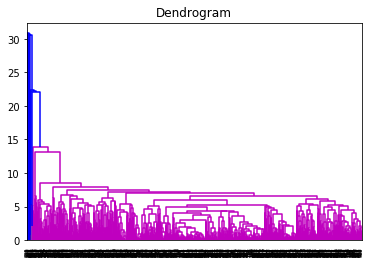

In [146]:
# Here we check the dendrogram and define our K-value
dendrogram=sch.dendrogram(sch.linkage(df2_std,method='average'))
plt.title('Dendrogram')

In [147]:
agg=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')

In [148]:
agg.fit(df2_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [149]:
labels1=pd.DataFrame(agg.labels_)

In [150]:
labels1=labels1.rename(columns={0:'clusters'})

In [153]:
agg_df=labels1.join(df2,rsuffix='')

In [154]:
agg_df.head()

,clusters,Survived,PassengerId,Age,Fare,FamilySize,IsMother,IsMale,Pclass_1,Pclass_2,...,Title_the countess,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_high,Fare_Bin_very_high,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
0,0,0,1,22.0,7.250,2,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,1,2,38.0,65.000,2,0,0,1,0,...,0,0,0,0,1,1,0,0,1,0
2,0,1,3,26.0,7.925,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,1,4,35.0,53.100,2,0,0,1,0,...,0,0,0,0,1,0,0,1,1,0
4,0,0,5,35.0,8.050,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0


# Comparing the labels

In [155]:
agg_df.clusters.value_counts()

0    889
2      1
1      1
Name: clusters, dtype: int64

In [156]:
k_means_df.clusters.value_counts()

0    413
2    263
1    215
Name: clusters, dtype: int64

## From above value counts clearly can see the each cluster count. K-means technique clustered this data set very well and also checked the cluster centers which are distinct from each other. Hierarchical technique is not good for this data set. 

# find out if there is any need of cluster values In Agglomerative Clustering. Write a Note on that

## I think after checking the lables of aggloremative clustering technique there is no need of cluster values for aggloremative

# Working on MNIST data set(Kaggle)

In [285]:
train=pd.read_csv('train.csv')

In [286]:
train.shape

(42000, 785)

In [287]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [222]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [288]:
x=train.drop(columns='label')
y=train.label

### Firstly dividing the data into train and test to verify the model

In [289]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=2)

## Applying PCA 

In [290]:
from sklearn.decomposition import PCA

In [291]:
#Standard Scaler
sc=StandardScaler()
xtrain_std=sc.fit_transform(xtrain)
xtest_std=sc.transform(xtest)

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sebas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [279]:
pc=PCA(n_components=None)
pricomp=pc.fit_transform(xtrain_std)

In [280]:
var=(pc.explained_variance_ratio_)*100

In [283]:
tot=0
for i in range(500):
    tot=tot+pc.explained_variance_ratio_[i]
tot

0.9878081754516743

In [292]:
pc=PCA(n_components=500)
pricomp=pc.fit_transform(xtrain_std)
pricomp_test=pc.transform(xtest_std)

In [293]:
var=(pc.explained_variance_ratio_)*100

# Using Random Forest

In [294]:
xtrain_std.shape

(29400, 784)

In [295]:
pricomp.shape

(29400, 500)

In [296]:
ytrain.shape

(29400,)

In [297]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [235]:
params={'max_depth':np.arange(1,10)}
rf=RandomForestClassifier()
GS=GridSearchCV(rf,params,cv=10)
GS.fit(pricomp,ytrain)
GS.best_params_

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

{'max_depth': 9}

In [298]:
data=pd.DataFrame(pc.components_)

In [299]:
xtrain_std.shape

(29400, 784)

In [300]:
from sklearn import metrics

In [301]:
rf=RandomForestClassifier(max_depth=9)
rf.fit(pricomp,ytrain)
rf_train_pred=rf.predict(pricomp)
rf_test_pred=rf.predict(pricomp_test)
print(np.sqrt(((rf_train_pred- ytrain) ** 2).mean()))
print(np.sqrt(((rf_test_pred- ytest) ** 2).mean()))

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.3904313430471464
1.7172329163188345


# Now testing on test data

In [302]:
test=pd.read_csv('test.csv')

In [303]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [304]:
#Apply the standard Scaler
sc=StandardScaler()
sca_test=sc.fit_transform(test)

C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sebas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [305]:
finaltest=pd.DataFrame(sca_test,columns=test.columns.values)

In [306]:

finaltest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009335,-0.008094,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009335,-0.008094,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009335,-0.008094,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009335,-0.008094,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030075,-0.020243,-0.015459,-0.009335,-0.008094,0.0,0.0,0.0,0.0,0.0


In [308]:
pc=PCA(n_components=500)
test_pred=pc.fit_transform(finaltest)

In [309]:
pricomp.shape

(29400, 500)

In [310]:
pred=rf.predict(test_pred)

In [311]:
pred.shape

(28000,)

In [312]:
r=np.arange(1,28001)

In [313]:
ImageId=r.tolist()

In [314]:
solution=pd.DataFrame({'ImageId':ImageId,'Label':pred})

In [315]:
solution.iloc[:,[1]]

,Label
0,0
1,0
2,4
3,4
4,3
5,7
6,0
7,3
8,5
9,8


In [316]:
solution.to_csv('MNIST_Pred_sabi.csv')

In [317]:
# Got a score of '0.55942'